In [2]:
import pandas as pd
import numpy as np

In [3]:
from seaborn import load_dataset
diamonds=load_dataset('diamonds')
diamonds.head()

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [4]:
from seaborn import load_dataset
titanic=load_dataset('titanic')
titanic.head()

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [5]:
df = titanic.copy()

In [14]:
df['class'].cat

# 판다스 기초

- **pd. Series ( data )**: Series 생성
- **pd. DataFrame ( data , columns = [ 'col1' ..] )**: df 생성
- **df.shape**: df 의 모양 제시
    - df.shape[0] : row 의 수
    - df.shape[1] : col 의 수 
- **df.columns**: columns 출력
- **df.info ( )**: nan의 수 , dtype, 크기 등 보여줌
- **df.dtypes**: 각 col 들의 dtype
- **df.describe ( )**: 통계량
- **df.values**: 각 index의 value 추출
    - df.values 를 통해서 데이터를 덩어리로 한번에 연산 가능
- **df.to_dict ( )**: df 를 dict 로 바꿈
- **df.to_numpy()**: df 를 numpy 형태로 바꾸어줌
- **df.corr ( )**: 상관관계
    - df[['col1','col2']].corr() : 특정 col 들에 대해서 correlation 을 집계 가능
- **df.index**: index 추출
- **.dropna()**: 결측값이 있는경우 삭제
    - **.dropna ( axis = 0 )**: 곁측값이 있는 데이터 (row) 를 삭제
    - **.dropna ( axis = 1 )**: 결측값 있는 열을 삭제(비추천)
    - **.dropna ( how = ' all ' )**: 결측값 있는 모든 행과 열을 삭제
    - **.dropna ( subset = [ 'col1','col2' ] )** : 특정 col 대해서 nan 이 있는경우 모두, 데이터(row) 삭제
- **.unique ( )**: unique 한 값들을 추출
    - output 이 list 형태이다.
    - 이 함수는 주로 범주형 값에만 사용
- **.nunique()** : unique 한 값들의 '갯수' 를 추출
    - groupby 와 함께 쓰이면 요긴하다.
- **.value_counts( )**: value 들의 counts 를 제시
    - 주로 범주형에 쓰이며, 내림차순으로 정렬까지 해주어서 유용하다.
- **.drop_duplicates ( subset = [ ' col1 ' , ' col2 ' ] )**: 중복값 삭제
    - subset의 col들에 대해서 같은 중복열이 있는 경우 삭제
    - subset 을 지정해주지 않으면, 완전히 같은 row 들이 삭제된다.
- **.reset_index()** : 인덱스 초기화
    - dropna 를 하고나서나, groupping 등을 하고나서 인덱스가 망가져있는 경우가 있다.
    - 이런 경우에 ,reset_index(inplace=True) 를 통해서 인덱스를 초기화시킨다.
- **.any(axis)**
    - 적어도 하나의 Ture 가 있을때에 true 생성
    - isnull 과 함께 쓰여서, col 또는 row 에 null 이 하나라도 있을때에 그 row 또는 col 출력 등의 연산에 이용된다.
        - df.isnull().any(axis=1) : 적어도 하나의 곁측치가 존재하는 row의 TF
    - 또는 value 가 어느정도 넘는값이 하나라도 존재하는 row 를 출력할 떄에도 쓰인다.
        - (df[[col1,col2..]]>10).any(axis=1) : 10 넘는 값이 하나라도 있는 row 의 TF
- **.all(axis)**
    - 모든것이 True 일떄에 True 생성
    - ~any 로 대체될 수 있지만 어쩃든 all 만 쓰는게 편할떄가 많다.
    - isnull 과 함께 쓰여서 곁측치가 없는 완전한 데이터를 출력할때에 사용 가능
    - 또는 모든 col 에 대해 양수인 data 를 꺼내는 등의 연산이 가능
- **.sort_values()** : 정렬
- **.replace([old],[new])**
    - old 한 값을 new 들로 한번에 바꾸어 준다.
    - df[col].replace(['현우','은정'],[hyun,eung]) : col 의 현우,은정을 hyun , eung 으로 바꿈
- **pd.cut(df['col'], bins, labels = name)**
    - bins 는 리스트 형태로, 그 범위를 지정 [4,6,np.inf]
    - names 는 리스트로 위 범위에 해당하게 바꾸고 싶은 이름 지정 ['작다','크다']
    - pd.cut(df['col'], [0,80,90,100] ,['F','B','A']) 

In [26]:
# 특정 index 의 corr
df[['age','survived']].corr()

age  survived
age       1.000000 -0.077221
survived -0.077221  1.000000

# 인덱싱

## []

- 인덱싱에는 iloc, loc, [] 가 있다
- [] : 가장 간단한 indexing 으로서, colunm 을 지정할 수 있다.

In [28]:
# number indexing 을 하게되면 sample들을 선택하게 된다.
df[4:10] # df.iloc[4:10] , df.loc[4:10] 모두 단일만 선택하면 sample 을 indexing 한다.

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
4    man        True  NaN  Southampton    no   True  
5    man        True  NaN   Queenstown    no   True  
6    man        True    E  Southampton    no   True  
7  child       False  NaN  Southampton    no  False  
8  woman       False  NaN  Southampton   yes  False  
9  child       False  NaN    Cherbourg   yes  False

In [29]:
# braket 안에 bracket 을 한번 더 쓰게 되면 pandas dataframe 이 된다. 
df[['survived','fare']]

survived     fare
0           0   7.2500
1           1  71.2833
2           1   7.9250
3           1  53.1000
4           0   8.0500
..        ...      ...
886         0  13.0000
887         1  30.0000
888         0  23.4500
889         1  30.0000
890         0   7.7500

[891 rows x 2 columns]

## loc

In [30]:
# loc 로 하게되면 column 을 inclusive 하게 선택하게 된다.
df.loc[:,'age':'parch']

age  sibsp  parch
0    22.0      1      0
1    38.0      1      0
2    26.0      0      0
3    35.0      1      0
4    35.0      0      0
..    ...    ...    ...
886  27.0      0      0
887  19.0      0      0
888   NaN      1      2
889  26.0      0      0
890  32.0      0      0

[891 rows x 3 columns]

## iloc

In [31]:
df = diamonds.copy()
df

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

- iloc 는 아래와 같이 조건문과 함께 쓸 경우 오류가 난다.
- 이는 iloc 는 'only position' 만을 쓰기 때문이다. 즉 boolean 은 position 이 아니라 에러가 나는것

In [32]:
(df['price'] > 500).values

array([False, False, False, ...,  True,  True,  True])

In [33]:
df.iloc[df['price'] > 500, 3]

NotImplementedError: iLocation based boolean indexing on an integer type is not available

- 굳이 쓰고 싶다면 values 를 쓴 이후에 써야한다.

In [34]:
df.iloc[(df['price'] > 500).values, 3]

60       VS1
61       SI1
62       SI1
63       SI1
64       SI2
        ... 
53935    SI1
53936    SI1
53937    SI1
53938    SI2
53939    SI2
Name: clarity, Length: 52191, dtype: object

In [35]:
# negative 를 통해서 '뒤에서 3번쨰' 를 -3 으로 표현할 수 있다.
df.iloc[:,-3:]

x     y     z
0      3.95  3.98  2.43
1      3.89  3.84  2.31
2      4.05  4.07  2.31
3      4.20  4.23  2.63
4      4.34  4.35  2.75
...     ...   ...   ...
53935  5.75  5.76  3.50
53936  5.69  5.75  3.61
53937  5.66  5.68  3.56
53938  6.15  6.12  3.74
53939  5.83  5.87  3.64

[53940 rows x 3 columns]

## drop

- 특정 column 만 제외하고 선택하고 싶다면, drop 으로 하는것이 좋다.

In [36]:
# x column 만 제외한 
df.drop(columns = ['x'])

carat        cut color clarity  depth  table  price     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.87  3.64

[53940 rows x 9 columns]

# 함수

## 내장 함수

- 판다스에 내장된 메소드를 이용하여, column wise 한 연산을 수행할 수 있다.

- 집계 함수
    - value=df['col'].dtype
    - value=df['col'].size # length of df['col']
    - value=df['col'].count()
    - value=df['col'].sum()
    - value=df['col'].prod()
    - value=df['col'].min()
    - value=df['col'].max()
    - value=df['col'].mean()
    - value=df['col'].median()
    - value=df['col'].cov(df['col2'])
    - value=df['col'].describe() # useful summary values
    - value=df['col'].value_counts() # frequency of each value (in Series)
    - value=df['col'].unique() # unique values (in Series)
    - values=df['col'].sample( n, replace=True ) # random selection of n values
    
    
- 변환 함수    
    - s = df['col'].isnull()
    - s = df['col'].astype(np.float64)
    - s = df['col'].abs()
    - s = df['col'].round(decimals=0)
    - s = df['col'].fillna(value=0) # replace NaN to 0
    - s = df['col'].replace([999, 0], np.NaN , inplace=True)
    - s = df['col'].cumsum()
    - s = df['col'].cumprod()
    - s = df['col'].diff(periods=1)
    - s = df['col'].shift(periods=1)
    - s = df['col'].pct_change(periods=1)
    
    
- 문자열 함수
    - s = df['col'].str.lower()
    - s = df['col'].str.upper()
    - s = df['col'].str.split(str)
    - s = df['col'].str.replace(old, new)
    - s = df['col'].str.startswith(prefix)
    - s = df['col'].str.endswith(suffix)
    - s = df['col'].str.isalpha()
    - s = df['col'].str.isnumeric()
    - s = df['col'].str.isalnum()

## 사용자 정의 함수(apply)

- 내장 함수에 대부분의 method 가 들어가 있지만 제곱, 루트같은 함수는 없다. 이런 함수를 적용하려면 함수를 정의한 이후 apply 를 적용하면 column 에 적용 가능하다

In [72]:
func = lambda x: x**2 + x # 이렇게 정의해도 가능
def func(x):
    val = x**2 + x
    return val

In [73]:
df['pclass'].apply(func)

sex
male      12
female     2
female    12
female     2
male      12
          ..
male       6
female     2
female    12
male       2
male      12
Name: pclass, Length: 891, dtype: int64

## 총체적인 집계

In [77]:
df.describe(include='all')

survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_town alive  \
count   891.000000      889    891  891        891  203          889   891   
unique         NaN        3      3    3          2    7            3     2   
top            NaN        S  Third  man       True    C  Southampton    no   
freq           NaN      644    491  537        537   59          644   549   
mean     32.204208      NaN    NaN  NaN        NaN  NaN          NaN   NaN   
std      49.693429      NaN    NaN  NaN        NaN  NaN          NaN   NaN   
min       0.000000      NaN    NaN  NaN        NaN  NaN          NaN   NaN   
25%       7.910400      NaN    NaN  NaN        NaN  NaN          NaN   NaN   
50%      14.454200      NaN    NaN  NaN        NaN  NaN          NaN   NaN   
75%      31.000000      NaN    NaN  NaN        NaN  NaN          NaN   NaN   
max     512.329200      NaN    NaN  NaN        NaN  NaN          NaN   NaN   

       alone  
count    891  
unique     2  
top     True  
freq     537  
mean     NaN  
std      NaN  
min      NaN  
25%      NaN  
50%      NaN  
75%      NaN  
max      NaN

## 범주형 갯수와 집계

- 주의점은 value_counts() 는 오로지 data frame 형식에서만 작동한다는 것이다.

In [78]:
df[['embarked']].value_counts()

embarked
S           644
C           168
Q            77
dtype: int64

## 빈도 상위 k개

- value counts 를 하게 되면 빈도수대로 상위 n 개를 보여준다.
- 그로므로 head , tail 을 적절히 섞어 쓴다면 빈도수 상위/하위를 집계 가능하다.

In [79]:
df[['embark_town']].value_counts().head(2)

embark_town
Southampton    644
Cherbourg      168
dtype: int64

# 정렬

## 오름/내림차순

- age, pclass 순서로 집계하되, 오름차순이 아니라 내림차순으로 집계

In [80]:
df.sort_values(['age','pclass'],ascending=False)

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
630         1       1    male  80.0      0      0  30.0000        S  First   
851         0       3    male  74.0      0      0   7.7750        S  Third   
96          0       1    male  71.0      0      0  34.6542        C  First   
493         0       1    male  71.0      0      0  49.5042        C  First   
116         0       3    male  70.5      0      0   7.7500        Q  Third   
..        ...     ...     ...   ...    ...    ...      ...      ...    ...   
766         0       1    male   NaN      0      0  39.6000        C  First   
793         0       1    male   NaN      0      0  30.6958        C  First   
815         0       1    male   NaN      0      0   0.0000        S  First   
839         1       1    male   NaN      0      0  29.7000        C  First   
849         1       1  female   NaN      1      0  89.1042        C  First   

       who  adult_male deck  embark_town alive  alone  
630    man        True    A  Southampton   yes   True  
851    man        True  NaN  Southampton    no   True  
96     man        True    A    Cherbourg    no   True  
493    man        True  NaN    Cherbourg    no   True  
116    man        True  NaN   Queenstown    no   True  
..     ...         ...  ...          ...   ...    ...  
766    man        True  NaN    Cherbourg    no   True  
793    man        True  NaN    Cherbourg    no   True  
815    man        True    B  Southampton    no   True  
839    man        True    C    Cherbourg   yes   True  
849  woman       False    C    Cherbourg   yes  False  

[891 rows x 15 columns]

# 조건

- 남자이면서 age 가 60살 이상인 사람

In [81]:
df[(df['sex']=='male') & (df['age']>=60)]

survived  pclass   sex   age  sibsp  parch      fare embarked   class  \
33          0       2  male  66.0      0      0   10.5000        S  Second   
54          0       1  male  65.0      0      1   61.9792        C   First   
96          0       1  male  71.0      0      0   34.6542        C   First   
116         0       3  male  70.5      0      0    7.7500        Q   Third   
170         0       1  male  61.0      0      0   33.5000        S   First   
252         0       1  male  62.0      0      0   26.5500        S   First   
280         0       3  male  65.0      0      0    7.7500        Q   Third   
326         0       3  male  61.0      0      0    6.2375        S   Third   
438         0       1  male  64.0      1      4  263.0000        S   First   
456         0       1  male  65.0      0      0   26.5500        S   First   
493         0       1  male  71.0      0      0   49.5042        C   First   
545         0       1  male  64.0      0      0   26.0000        S   First   
555         0       1  male  62.0      0      0   26.5500        S   First   
570         1       2  male  62.0      0      0   10.5000        S  Second   
587         1       1  male  60.0      1      1   79.2000        C   First   
625         0       1  male  61.0      0      0   32.3208        S   First   
630         1       1  male  80.0      0      0   30.0000        S   First   
672         0       2  male  70.0      0      0   10.5000        S  Second   
684         0       2  male  60.0      1      1   39.0000        S  Second   
694         0       1  male  60.0      0      0   26.5500        S   First   
745         0       1  male  70.0      1      1   71.0000        S   First   
851         0       3  male  74.0      0      0    7.7750        S   Third   

     who  adult_male deck  embark_town alive  alone  
33   man        True  NaN  Southampton    no   True  
54   man        True    B    Cherbourg    no  False  
96   man        True    A    Cherbourg    no   True  
116  man        True  NaN   Queenstown    no   True  
170  man        True    B  Southampton    no   True  
252  man        True    C  Southampton    no   True  
280  man        True  NaN   Queenstown    no   True  
326  man        True  NaN  Southampton    no   True  
438  man        True    C  Southampton    no  False  
456  man        True    E  Southampton    no   True  
493  man        True  NaN    Cherbourg    no   True  
545  man        True  NaN  Southampton    no   True  
555  man        True  NaN  Southampton    no   True  
570  man        True  NaN  Southampton   yes   True  
587  man        True    B    Cherbourg   yes  False  
625  man        True    D  Southampton    no   True  
630  man        True    A  Southampton   yes   True  
672  man        True  NaN  Southampton    no   True  
684  man        True  NaN  Southampton    no  False  
694  man        True  NaN  Southampton    no   True  
745  man        True    B  Southampton    no  False  
851  man        True  NaN  Southampton    no   True

## 다중 포함

In [82]:
# class 가 First, Third 에 포함되는 데이터 
df[df['class'].isin(['First','Third'])]

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0           0       3    male  22.0      1      0   7.2500        S  Third   
1           1       1  female  38.0      1      0  71.2833        C  First   
2           1       3  female  26.0      0      0   7.9250        S  Third   
3           1       1  female  35.0      1      0  53.1000        S  First   
4           0       3    male  35.0      0      0   8.0500        S  Third   
..        ...     ...     ...   ...    ...    ...      ...      ...    ...   
885         0       3  female  39.0      0      5  29.1250        Q  Third   
887         1       1  female  19.0      0      0  30.0000        S  First   
888         0       3  female   NaN      1      2  23.4500        S  Third   
889         1       1    male  26.0      0      0  30.0000        C  First   
890         0       3    male  32.0      0      0   7.7500        Q  Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
885  woman       False  NaN   Queenstown    no  False  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  
889    man        True    C    Cherbourg   yes   True  
890    man        True  NaN   Queenstown    no   True  

[707 rows x 15 columns]

# 문자열

## 시작하는 문자로 선택

- S 로 시작하는 embarked_town 찾기

In [83]:
# 원래 NA 가 있으면 str 메소드가 잘 적용되지 않는다.
# 하지만 na = False 를 통해서 NA 가 있음에도 잘 적용할 수 있다.
df[df['embark_town'].str.startswith("S",na=False)]

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
6           0       1    male  54.0      0      0  51.8625        S   First   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
883         0       2    male  28.0      0      0  10.5000        S  Second   
884         0       3    male  25.0      0      0   7.0500        S   Third   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   

       who  adult_male deck  embark_town alive  alone  
0      man        True  NaN  Southampton    no  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
4      man        True  NaN  Southampton    no   True  
6      man        True    E  Southampton    no   True  
..     ...         ...  ...          ...   ...    ...  
883    man        True  NaN  Southampton    no   True  
884    man        True  NaN  Southampton    no   True  
886    man        True  NaN  Southampton    no   True  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  

[644 rows x 15 columns]

# 치환

## 인덱스 치환

In [84]:
df.index = df['sex']
df

survived  pclass     sex   age  sibsp  parch     fare embarked  \
sex                                                                      
male           0       3    male  22.0      1      0   7.2500        S   
female         1       1  female  38.0      1      0  71.2833        C   
female         1       3  female  26.0      0      0   7.9250        S   
female         1       1  female  35.0      1      0  53.1000        S   
male           0       3    male  35.0      0      0   8.0500        S   
...          ...     ...     ...   ...    ...    ...      ...      ...   
male           0       2    male  27.0      0      0  13.0000        S   
female         1       1  female  19.0      0      0  30.0000        S   
female         0       3  female   NaN      1      2  23.4500        S   
male           1       1    male  26.0      0      0  30.0000        C   
male           0       3    male  32.0      0      0   7.7500        Q   

         class    who  adult_male deck  embark_town alive  alone  
sex                                                               
male     Third    man        True  NaN  Southampton    no  False  
female   First  woman       False    C    Cherbourg   yes  False  
female   Third  woman       False  NaN  Southampton   yes   True  
female   First  woman       False    C  Southampton   yes  False  
male     Third    man        True  NaN  Southampton    no   True  
...        ...    ...         ...  ...          ...   ...    ...  
male    Second    man        True  NaN  Southampton    no   True  
female   First  woman       False    B  Southampton   yes   True  
female   Third  woman       False  NaN  Southampton    no  False  
male     First    man        True    C    Cherbourg   yes   True  
male     Third    man        True  NaN   Queenstown    no   True  

[891 rows x 15 columns]

In [87]:
df = titanic.copy()

# 그룹핑

- 그룹핑은 기본적으로 Groupby 함수를 통해서 이루어진다.
- df.Groupby('sex') 의 의미는 sex 를 기준으로 각각에 해당하는 set 으로 나눈다는 의미이다. (즉 남자 set, 여자 set)
- Groupby 자체로는 그 객체만을 return 한다. 옆에 연산을 붙여주어야 set 마다 함수를 적용하게 되고, 그제야 비로소 의미를 가지게 된다.

- 아래 두 예시를 보면 groupby object 가 어떤것들을 저장하고 있는지를 알 수 있다.
- groupby 로 저장하였을때의 기준과(i)
- groupby 로 나눈 기준의 df 를 저장하고 있다.

In [88]:
for i,data in df.groupby('sex'):
    print(i)

female
male


In [89]:
for i,data in df.groupby('sex'):
    print(data)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
8           1       3  female  27.0      0      2  11.1333        S   Third   
9           1       2  female  14.0      1      0  30.0708        C  Second   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
880         1       2  female  25.0      0      1  26.0000        S  Second   
882         0       3  female  22.0      0      0  10.5167        S   Third   
885         0       3  female  39.0      0      5  29.1250        Q   Third   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   

       who  adult_male deck  embark_town alive  alo

In [90]:
# 다음과 같이 groupby 는 sex 로 그룹을 나누었을때, 그 기준들로 붂여진 set(df) 를 저장하고 있다..
df.groupby('sex').get_group('female')

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
8           1       3  female  27.0      0      2  11.1333        S   Third   
9           1       2  female  14.0      1      0  30.0708        C  Second   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
880         1       2  female  25.0      0      1  26.0000        S  Second   
882         0       3  female  22.0      0      0  10.5167        S   Third   
885         0       3  female  39.0      0      5  29.1250        Q   Third   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   

       who  adult_male deck  embark_town alive  alone  
1    woman       False    C    Cherbourg   yes  False  
2    woman       False  NaN  Southampton   yes   True  
3    woman       False    C  Southampton   yes  False  
8    woman       False  NaN  Southampton   yes  False  
9    child       False  NaN    Cherbourg   yes  False  
..     ...         ...  ...          ...   ...    ...  
880  woman       False  NaN  Southampton   yes  False  
882  woman       False  NaN  Southampton    no   True  
885  woman       False  NaN   Queenstown    no  False  
887  woman       False    B  Southampton   yes   True  
888  woman       False  NaN  Southampton    no  False  

[314 rows x 15 columns]

- 기본적으로 연산함수는 아래와 같이 4개 종류가 적용이 가능하며 그 output 은 각기 다르다.
    - agg : 집계
    - filter : 집계
    - transform : 데이터프레임
    - apply : 모든형태

## agg

- agg 는 데이터의 col 을 늘릴때 쓰는 함수가 아니라 데이터의 특성을 살펴볼 때에 사용되는 함수이다.
- 각 범주별(grouping 된)로 나누눠진 set 들에 대해 agg(함수) 를 통해 각각 함수를 적용한 값을 return 한다.

In [91]:
# sum 을 적용하며, 성별별로 sum 을 return 한다
df.groupby('sex').agg(sum)

survived  pclass       age  sibsp  parch        fare  adult_male  \
sex                                                                        
female       233     678   7286.00    218    204  13966.6628           0   
male         109    1379  13919.17    248    136  14727.2865         537   

        alone  
sex            
female    126  
male      411

In [92]:
# numpy 의 함수도 적용할 수 있다.
df.groupby('sex').agg(np.mean)

survived    pclass        age     sibsp     parch       fare  \
sex                                                                    
female  0.742038  2.159236  27.915709  0.694268  0.649682  44.479818   
male    0.188908  2.389948  30.726645  0.429809  0.235702  25.523893   

        adult_male     alone  
sex                           
female    0.000000  0.401274  
male      0.930676  0.712305

In [93]:
# 전체 df 에 적용하기 싫고, 하나의 값에 대해서만 궁금할 수 있다.(pclass 별 평균나이)
# 그럴때에는 df의 일부만 선택하면 된다.
df[['age']].groupby(df['pclass']).agg(np.mean) 

age
pclass           
1       38.233441
2       29.877630
3       25.140620

## transform

- transform 을 적용하게 되면, 모든 데이터의 row 옆에 집계값이 붙게 된다.
- col 을 늘릴때에 적합

In [94]:
# sum 으로 agg 를 적용하면 총 갯수(count) 를 알려준다. 
df.groupby('sex').transform(np.mean)

survived    pclass        age     sibsp     parch       fare  adult_male  \
0    0.188908  2.389948  30.726645  0.429809  0.235702  25.523893    0.930676   
1    0.742038  2.159236  27.915709  0.694268  0.649682  44.479818    0.000000   
2    0.742038  2.159236  27.915709  0.694268  0.649682  44.479818    0.000000   
3    0.742038  2.159236  27.915709  0.694268  0.649682  44.479818    0.000000   
4    0.188908  2.389948  30.726645  0.429809  0.235702  25.523893    0.930676   
..        ...       ...        ...       ...       ...        ...         ...   
886  0.188908  2.389948  30.726645  0.429809  0.235702  25.523893    0.930676   
887  0.742038  2.159236  27.915709  0.694268  0.649682  44.479818    0.000000   
888  0.742038  2.159236  27.915709  0.694268  0.649682  44.479818    0.000000   
889  0.188908  2.389948  30.726645  0.429809  0.235702  25.523893    0.930676   
890  0.188908  2.389948  30.726645  0.429809  0.235702  25.523893    0.930676   

        alone  
0    0.712305  
1    0.401274  
2    0.401274  
3    0.401274  
4    0.712305  
..        ...  
886  0.712305  
887  0.401274  
888  0.401274  
889  0.712305  
890  0.712305  

[891 rows x 8 columns]

In [95]:
# 살아남음/ 죽은사람 중 나이의 최댓값을 new 의 column 으로 늘림
df['new']= df['age'].groupby(df['survived']).transform(np.max)
df

survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alone   new  
0      man        True  NaN  Southampton    no  False  74.0  
1    woman       False    C    Cherbourg   yes  False  80.0  
2    woman       False  NaN  Southampton   yes   True  80.0  
3    woman       False    C  Southampton   yes  False  80.0  
4      man        True  NaN  Southampton    no   True  74.0  
..     ...         ...  ...          ...   ...    ...   ...  
886    man        True  NaN  Southampton    no   True  74.0  
887  woman       False    B  Southampton   yes   True  80.0  
888  woman       False  NaN  Southampton    no  False  74.0  
889    man        True    C    Cherbourg   yes   True  80.0  
890    man        True  NaN   Queenstown    no   True  74.0  

[891 rows x 16 columns]

## apply

- apply 의 경우 agg 보다 속도는 느리지만 정의에 따라 transform 처럼 row 옆에 붙이거나 또는 agg 처럼 그룹별로 붙일 수 있기때문에 범용성이 높다

In [96]:
# apply 를 정의할 떄에 'df' 에 대해 정의를 하였기 때문에, 그 출력값이 transform 처럼 dataframe 이 유지되면서 옆에 붙었다.
df.groupby('sex').apply(lambda df : df.sort_values(['parch']).reset_index(drop=True))

survived  pclass     sex   age  sibsp  parch      fare embarked  \
sex                                                                           
female 0           1       1  female  38.0      1      0   71.2833        C   
       1           1       2  female  28.0      1      0   26.0000        S   
       2           1       2  female  19.0      0      0   26.0000        S   
       3           1       3  female   NaN      1      0   16.1000        S   
       4           1       2  female  42.0      1      0   26.0000        S   
...              ...     ...     ...   ...    ...    ...       ...      ...   
male   572         0       3    male  14.0      5      2   46.9000        S   
       573         0       3    male  16.0      1      3   34.3750        S   
       574         0       1    male  64.0      1      4  263.0000        S   
       575         0       3    male  40.0      1      4   27.9000        S   
       576         0       3    male  39.0      1      5   31.2750        S   

             class    who  adult_male deck  embark_town alive  alone   new  
sex                                                                         
female 0     First  woman       False    C    Cherbourg   yes  False  80.0  
       1    Second  woman       False  NaN  Southampton   yes  False  80.0  
       2    Second  woman       False  NaN  Southampton   yes   True  80.0  
       3     Third  woman       False  NaN  Southampton   yes  False  80.0  
       4    Second  woman       False  NaN  Southampton   yes  False  80.0  
...            ...    ...         ...  ...          ...   ...    ...   ...  
male   572   Third  child       False  NaN  Southampton    no  False  74.0  
       573   Third    man        True  NaN  Southampton    no  False  74.0  
       574   First    man        True    C  Southampton    no  False  74.0  
       575   Third    man        True  NaN  Southampton    no  False  74.0  
       576   Third    man        True  NaN  Southampton    no  False  74.0  

[891 rows x 16 columns]

In [97]:
df.groupby('sex').apply(lambda x : min(x))

sex
female    adult_male
male      adult_male
dtype: object

In [104]:
df.groupby('sex').

In [100]:
# apply 를 정의할 때에 df


df.groupby('sex').

sex        
female  1      192.2833
        2      118.9250
        3      171.1000
        8      124.1333
        9      128.0708
                 ...   
male    883    116.5000
        884    111.0500
        886    118.0000
        889    140.0000
        890    118.7500
Length: 891, dtype: float64

### 사용자 정의 함수

In [7]:
def User_def(x):
    return x.max() / x.min()

In [8]:
df['age'].groupby(df['sex']).agg(User_def)

sex
female     84.00000
male      190.47619
Name: age, dtype: float64

# 시각화

- plt, sns, 테블루 다 있지만, pandas 에서 바로바로 시각화를 할 코드를 알면 훨씬 편리하다.

- kind 로 기본적인 그래프 모양이 조절된다.
    - ‘bar’ or ‘barh’ for bar plots
    - ‘hist’ for histogram
    - ‘box’ for boxplot
    - ‘kde’ or ‘density’ for density plots
    - ‘area’ for area plots
    - ‘scatter’ for scatter plots
    - ‘hexbin’ for hexagonal bin plots
    - ‘pie’ for pie plots



In [76]:
df = diamonds.copy()
df

carat        cut color clarity  depth  table  price     x     y     z
0       0.23      Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1       0.21    Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2       0.23       Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3       0.29    Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4       0.31       Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53938   0.86    Premium     H     SI2   61.0   58.0   2757  6.15  6.12  3.74
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[53940 rows x 10 columns]

## Histogram

<AxesSubplot:>

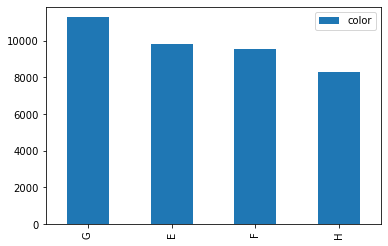

In [128]:
# 가장 많이 나온 값 4개 barplot
pd.DataFrame(df['color'].value_counts())[0:4].plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

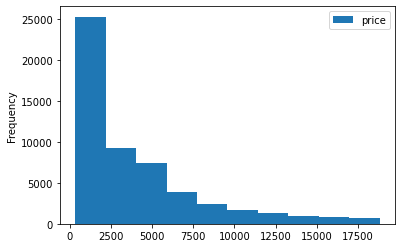

In [131]:
# Price 에 대한 Histogram
pd.DataFrame(df['price']).plot.hist()

## Box plot

<AxesSubplot:>

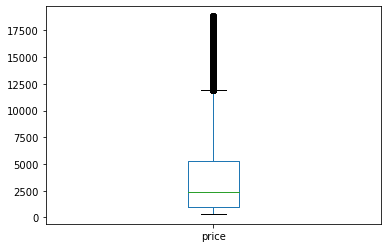

In [162]:
df['price'].plot.box()

## Scatter

<AxesSubplot:xlabel='carat', ylabel='price'>

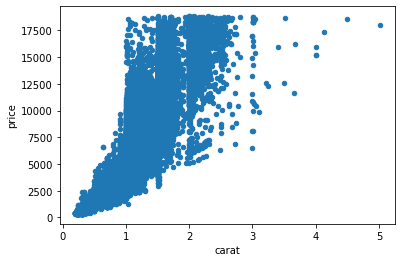

In [140]:
df.plot.scatter(x='carat',y='price')

## Hexagonal bin

<AxesSubplot:xlabel='carat', ylabel='price'>

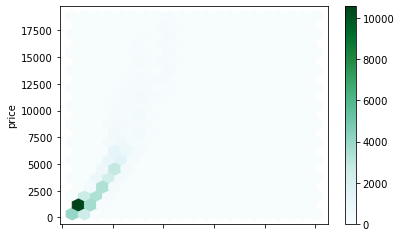

In [169]:
df.plot.hexbin(x='carat',y='price',gridsize=20)

## Groupby + plot

- group by 는 아래처럼 index, group 이 둘다 각각 들어있는 set 으로 생각할 수 있다.
- 그러므로 아래 index(나누는 기준) 과 grouop(나눠진 데이터셋) 을 이용한다면 많은 그림을 그릴 수 있다.

In [152]:
for title, group in df.groupby('color'): 
    print(group)

       carat        cut color clarity  depth  table  price     x     y     z
28      0.23  Very Good     D     VS2   60.5   61.0    357  3.96  3.97  2.40
34      0.23  Very Good     D     VS1   61.9   58.0    402  3.92  3.96  2.44
38      0.26  Very Good     D     VS2   60.8   59.0    403  4.13  4.16  2.52
42      0.26       Good     D     VS2   65.2   56.0    403  3.99  4.02  2.61
43      0.26       Good     D     VS1   58.4   63.0    403  4.19  4.24  2.46
...      ...        ...   ...     ...    ...    ...    ...   ...   ...   ...
53934   0.72    Premium     D     SI1   62.7   59.0   2757  5.69  5.73  3.58
53935   0.72      Ideal     D     SI1   60.8   57.0   2757  5.75  5.76  3.50
53936   0.72       Good     D     SI1   63.1   55.0   2757  5.69  5.75  3.61
53937   0.70  Very Good     D     SI1   62.8   60.0   2757  5.66  5.68  3.56
53939   0.75      Ideal     D     SI2   62.2   55.0   2757  5.83  5.87  3.64

[6775 rows x 10 columns]
       carat        cut color clarity  depth  tabl

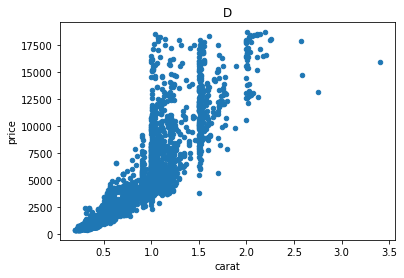

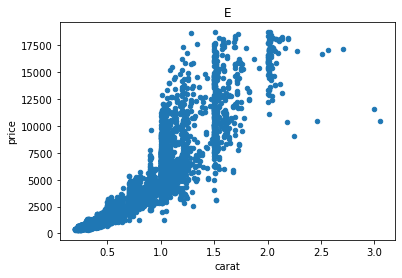

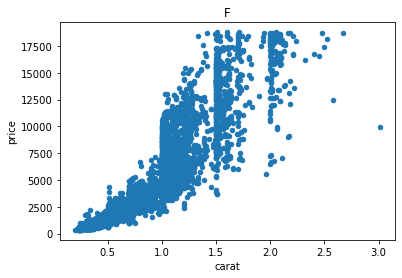

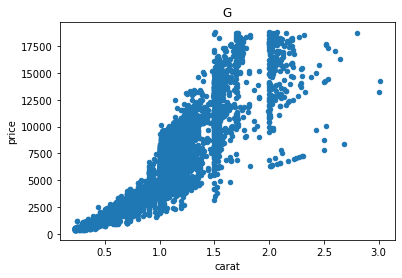

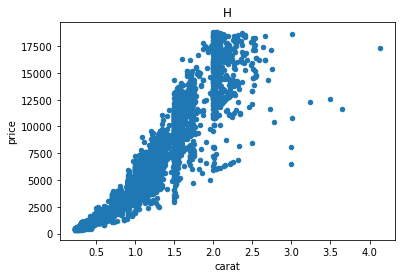

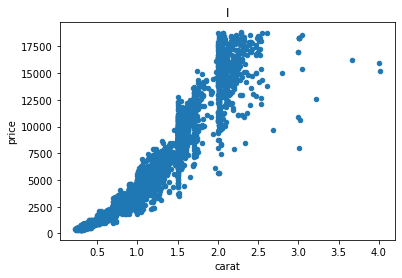

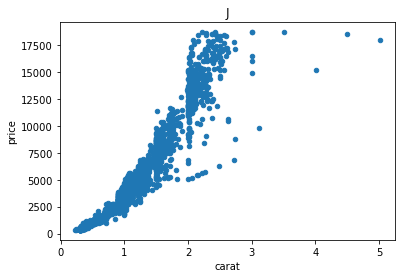

In [154]:
import matplotlib.pyplot as plt
for title, group in df.groupby('color'):
    group.plot.scatter(x='carat', y='price', title=title)

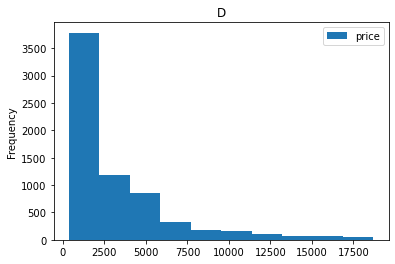

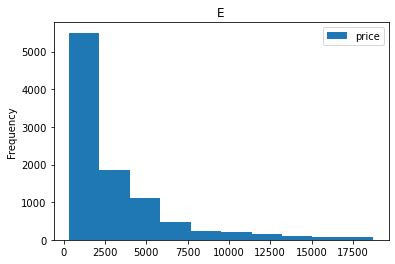

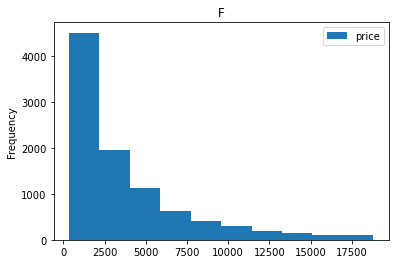

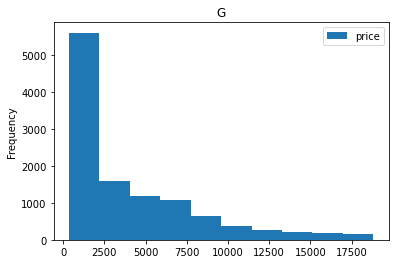

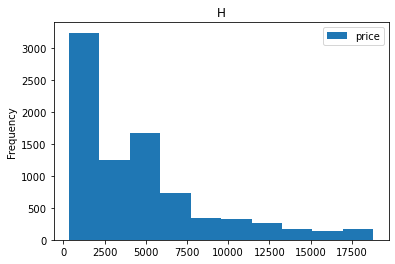

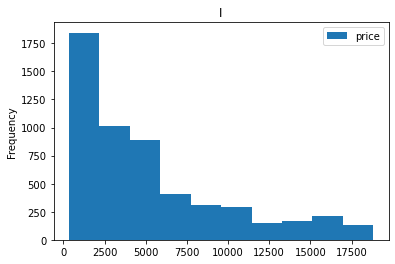

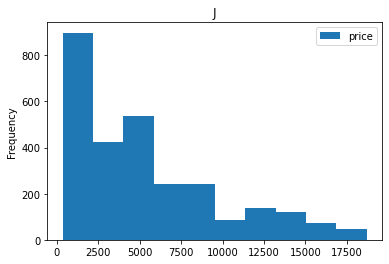

In [160]:
for title, group in df[['color','price']].groupby('color'):
    group.plot.hist(title=title)